# Ho = Crime does not correlate with weather (T) and proximity to ice-cream shops! 
# Ha = Crime correlates with weather (T) and proximity to ice-cream shops!

**ASSUMPTIONS:**
1. Only considering crime in Atlanta for 2016
2. Focusing on 5 different types of crime:
    - LARCENY-FROM VEHICLE
    - BURGLARY-RESIDENCE
    - ROBBERY-PEDESTRIAN
    - RAPE
    - HOMICIDE
3. We are focusing historical weather data including:
    - AVERAGE TEMPERATURE
    - HUMIDITY
    - PRECIPITATION
    - WIND SPEED
    - CONDITIONS
4. We are focusing on ice cream shopsusing Google API:
    - Within a Radius of 1 Mile
    - Business Types: Cafe, Restaurant, Drugstore
    

# Section 1: Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import gmaps
import scipy.stats as sts
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Section 2: Load Datasets

In [2]:
# Load individual groups

#1. LARCENY-FROM VEHICLE
path = os.path.join('..','Resources','larceny2.csv')
g1w = pd.read_csv(path)
g1w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#2. BURGLARY-RESIDENCE
path = os.path.join('..','Resources','burglary2.csv')
g2w = pd.read_csv(path)
g2w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#3. ROBBERY-PEDESTRIAN
path = os.path.join('..','Resources','robbery2.csv')
g3w = pd.read_csv(path)
g3w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#4. RAPE
path = os.path.join('..','Resources','rape2.csv')
g4w = pd.read_csv(path)
g4w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#5. HOMICIDE
path = os.path.join('..','Resources','homicide2.csv')
g5w = pd.read_csv(path)
g5w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

In [3]:
#ANALYSIS FOR CRIME TYPE LARCENY-FROM VEHICLE
#Divide into groups based on Crime Count
#Low Crime
g1 = g1w.loc[(g1w['Crime Count']>=9) & (g1w['Crime Count']<=23)]
#Medium Crime
g2 = g1w.loc[(g1w['Crime Count']>=24) & (g1w['Crime Count']<=38)]
#High Crime
g3 = g1w.loc[(g1w['Crime Count']>=39) & (g1w['Crime Count']<=51)]

In [4]:
g1.head()

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed,Conditions,Ice Cream Shop
0,1,1,21,42.8,67.84,0.00,13.3,Partially cloudy,77
6,1,7,14,50.1,56.86,0.00,11.7,Overcast,47
7,1,8,18,51.1,85.55,0.23,9.9,"Rain, Overcast",64
8,1,9,20,49.9,88.55,0.30,11.0,"Rain, Overcast",72
10,1,11,20,32.0,50.33,0.00,11.0,Clear,66


# Section 3: ANOVA Test

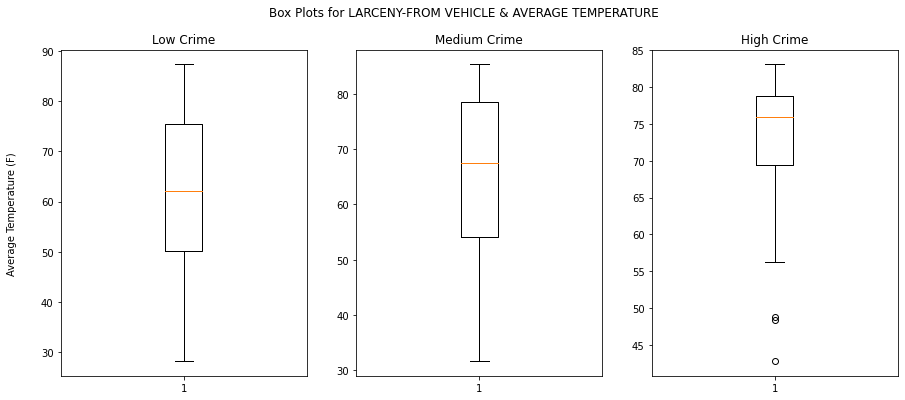

In [5]:
#ANOVA TEST FOR AVERAGE TEMPERATURE
fig,ax = plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Box Plots for LARCENY-FROM VEHICLE & AVERAGE TEMPERATURE ')
ax[0].boxplot(g1['Avg_Temp'])
ax[0].title.set_text('Low Crime')
ax[1].boxplot(g2['Avg_Temp'])
ax[1].title.set_text('Medium Crime')
ax[2].boxplot(g3['Avg_Temp'])
ax[2].title.set_text('High Crime')
fig.text(0.08, 0.5, 'Average Temperature (F)', ha='center', va='center', rotation ='vertical')
plt.show()

In [6]:
# Perform ANOVA TEST FOR AVERAGE TEMPERATURE
sts.f_oneway(g1['Avg_Temp'], g2['Avg_Temp'], g3['Avg_Temp'])

F_onewayResult(statistic=6.815355123938199, pvalue=0.0012426464587675927)

**Conclusion:**
We can reject Ho with p value of 0.0012, most likely Temperature has a level of correlation with amount of crimes

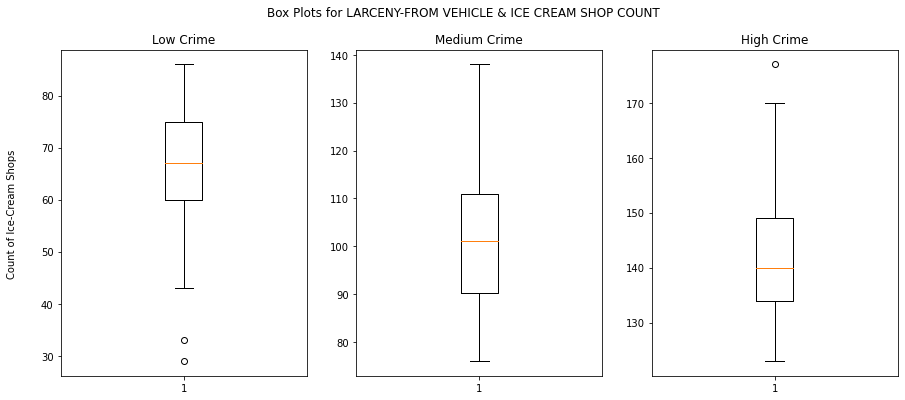

In [7]:
#ANOVA TEST FOR ICE CREAM SHOP COUNT
fig,ax = plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Box Plots for LARCENY-FROM VEHICLE & ICE CREAM SHOP COUNT ')
ax[0].boxplot(g1['Ice Cream Shop'])
ax[0].title.set_text('Low Crime')
ax[1].boxplot(g2['Ice Cream Shop'])
ax[1].title.set_text('Medium Crime')
ax[2].boxplot(g3['Ice Cream Shop'])
ax[2].title.set_text('High Crime')
fig.text(0.08, 0.5, 'Count of Ice-Cream Shops', ha='center', va='center', rotation ='vertical')
plt.show()

In [8]:
# Perform ANOVA TEST FOR ICE CREAM SHOP COUNT
sts.f_oneway(g1['Ice Cream Shop'], g2['Ice Cream Shop'], g3['Ice Cream Shop'])

F_onewayResult(statistic=606.7604795735031, pvalue=1.739995091998492e-116)

**Conclusion:**
We can reject Ho with p value of 1.73e-116, most likely the number of Ice Cream Shops in the vicinity of a crime has a level of correlation with amount of crimes

# Section 4: Chi Square Test

In [9]:
# Create Dataframe of Observed vs Expected values for Avg Temp and Count of Ice Cream Shops
df = pd.DataFrame({'Observed T':[g1['Avg_Temp'].sum(),g2['Avg_Temp'].sum(),g3['Avg_Temp'].sum()],
                  'Observed I':[g1['Ice Cream Shop'].sum(),g2['Ice Cream Shop'].sum(),g3['Ice Cream Shop'].sum()]})
df['Expected T']=df['Observed T'].mean()
df['Expected I']=df['Observed I'].mean()
df = df[['Observed T','Expected T','Observed I','Expected I']]
df.rename(index={0: 'Low Crime', 1:'Medium Crime', 2:'High Crime'}, inplace=True)
df

,Observed T,Expected T,Observed I,Expected I
Low Crime,8226.3,7874.2,8874,11317.666667
Medium Crime,12882.5,7874.2,20092,11317.666667
High Crime,2513.8,7874.2,4987,11317.666667


In [10]:
#Calculate the critical value
critical_value = sts.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [11]:
# Run the chi square test for AVERAGE TEMPERATURE
sts.chisquare(df['Observed T'], df['Expected T'])

Power_divergenceResult(statistic=6850.337997510856, pvalue=0.0)

**Conclusion:**
Since the chi-square value of 6850 at a confidence level of 95% exceeds the critical value of 5.99, we conclude that the differences seen in the number of crime counts per crime group are statistically significant for TEMPERATURE.

In [12]:
# Run the chi square test for ICE CREAM SHOP COUNTS
sts.chisquare(df['Observed I'], df['Expected I'])

Power_divergenceResult(statistic=10871.302035166258, pvalue=0.0)

**Conclusion:**
Since the chi-square value of 10871 at a confidence level of 95% exceeds the critical value of 5.99, we conclude that the differences seen in the number of crime counts per crime group are statistically significant for ICE CREAM SHOP COUNTS.

# Section 5: Conclusion

We reject Ho and accept Ha: Most likely crime counts have a correlation with weather data and number of ice cream shops in the vicinity